# Capstone Project Part 5: Baseline Models and EDA Pre-Tokenizing

**Authur:** Kate Meredith 

**Date:** September-November 2022

**Notebook #**: 5 of 7

## Table of Contents

* [1. Background](#header1)
* [2. Importing Libraries](#header2)
* [3. Importing the Data](#header3)
* [4. Exploratory Data Analysis](#header4)
* [5. Creating Training, Val and Testing Datasets](#header5)
    * [5.1 Stratefying the Data](#subheader51)
    * [5.2 Creating X and y Values](#subheader52)
    * [5.3 Graphing Relationships Between Features and Target](#subheader53)
    * [5.4 Creating Remain (Training), Validate, Test Splits](#subheader54)
* [6. Scaling the Data](#header6)
* [7. Creating Baseline Models](#header7)
    * [7.1 Model 1: Linear Regression](#subheader71)
    * [7.2 Model 2: KNN](#subheader72)
    * [7.3 Model 3: Random Forest](#subheader73)
    * [7.4 Model 4: Support Vector Machine (SVR)](#subheader74)
    * [7.5 Model 5: XG Boost Regressor](#subheader75)
    * [7.6 Model 6: Neural Network](#subheader76)
* [8. Summary of Baseline Model Performance](#header8)
* [9. References](#header9)

## 1. Background <a class="anchor" id="header1"></a>

**Source:** Data was collected from [CoffeeReview.com](https://www.coffeereview.com/) and grouped into two DataFrames for cleaning. See prior notebooks for details on scraping, cleaning and compilation.

**Goal:** Complete some initial EDA and baseline models using numeric data that does not require tokenizing as a baseline. These models are intended to provide a baseline sense of performance only. Later notebooks will add in the text data and optimize hyperparameters in pursuit of a best performing model.

## 2. Importing Libraries <a class="anchor" id="header2"></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import operator

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.callbacks import EarlyStopping

/Users/katemondal/opt/anaconda3/envs/capstone/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## 3. Importing Data <a class="anchor" id="header3"></a>

In [3]:
#importing data
coffee = pd.read_csv('coffee.csv')

## 4. Exploratory Data Analysis (EDA) <a class="anchor" id="header4"></a>

Checking datatypes and for null values:

In [4]:
#overview of df
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6557 entries, 0 to 6556
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   coffee_name    6557 non-null   object 
 1   roaster_name   6557 non-null   object 
 2   month          6557 non-null   int64  
 3   year           6557 non-null   int64  
 4   bean_agtron    6557 non-null   int64  
 5   ground_agtron  6557 non-null   int64  
 6   aroma          6557 non-null   int64  
 7   acidity        6557 non-null   int64  
 8   body           6557 non-null   int64  
 9   flavor         6557 non-null   int64  
 10  aftertaste     6557 non-null   int64  
 11  roaster_lat    6557 non-null   float64
 12  roaster_lon    6557 non-null   float64
 13  origin_lat     6557 non-null   float64
 14  origin_lon     6557 non-null   float64
 15  p1             6557 non-null   object 
 16  p2             6557 non-null   object 
 17  p3             6557 non-null   object 
 18  overall_

In [5]:
#checking nan
coffee.isnull().sum()

coffee_name      0
roaster_name     0
month            0
year             0
bean_agtron      0
ground_agtron    0
aroma            0
acidity          0
body             0
flavor           0
aftertaste       0
roaster_lat      0
roaster_lon      0
origin_lat       0
origin_lon       0
p1               0
p2               0
p3               0
overall_score    0
dtype: int64

Creating numeric only df to run initial models from:

In [6]:
numeric_df = coffee.filter(['month','year','bean_agtron','ground_agtron','aroma','acidity','body','flavor','aftertaste','roaster_lat','roaster_lon','origin_lat','origin_lon','overall_score'], axis = 1)

In [7]:
#previewing numeric dataframe
numeric_df.head()

,month,year,bean_agtron,ground_agtron,aroma,acidity,body,flavor,aftertaste,roaster_lat,roaster_lon,origin_lat,origin_lon,overall_score
0,10,2022,60,77,9,9,9,9,8,37.973535,-122.531087,4.099917,-72.908813,94
1,10,2022,58,78,9,9,9,9,8,33.448437,-112.074141,-6.869970,-75.045851,94
2,10,2022,59,77,9,9,8,9,8,33.448437,-112.074141,4.099917,-72.908813,93
3,10,2022,62,78,8,8,9,9,8,37.973535,-122.531087,12.609016,-85.293691,92
4,10,2022,65,81,9,9,8,9,8,25.072134,121.679919,10.211670,38.652120,93


Plotting numeric value histograms to get sense of distribution. Code based on clustering codealong.

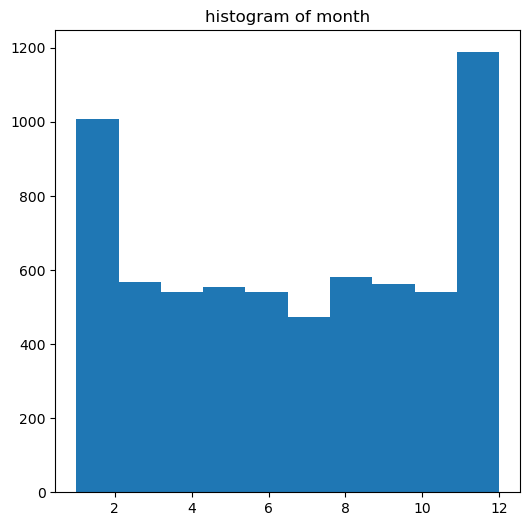

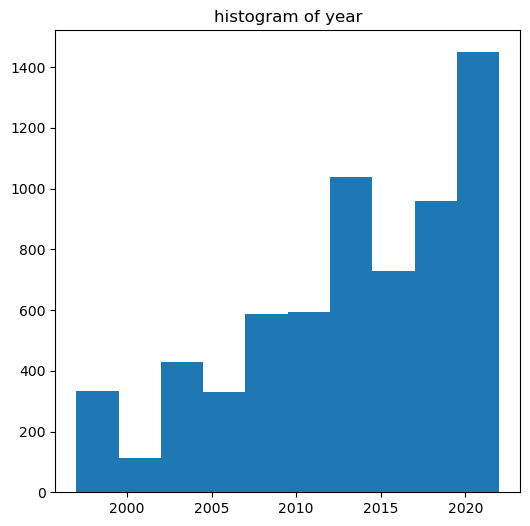

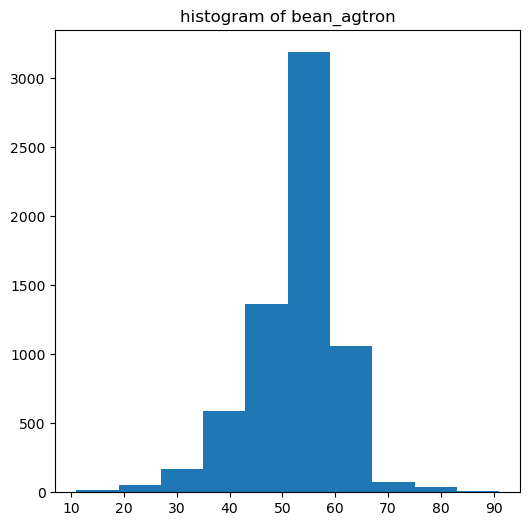

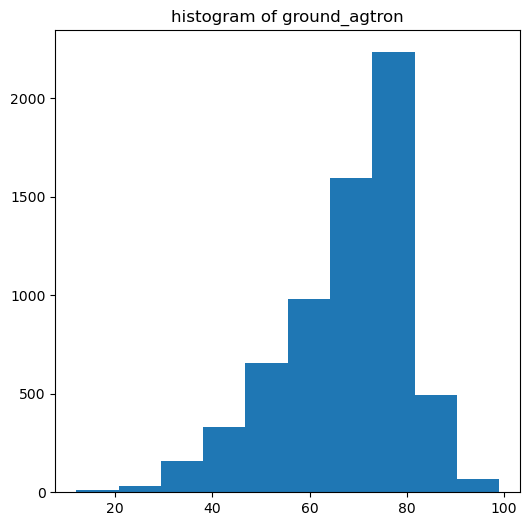

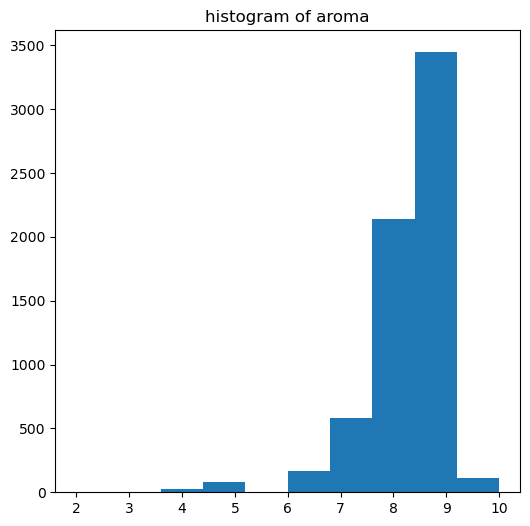

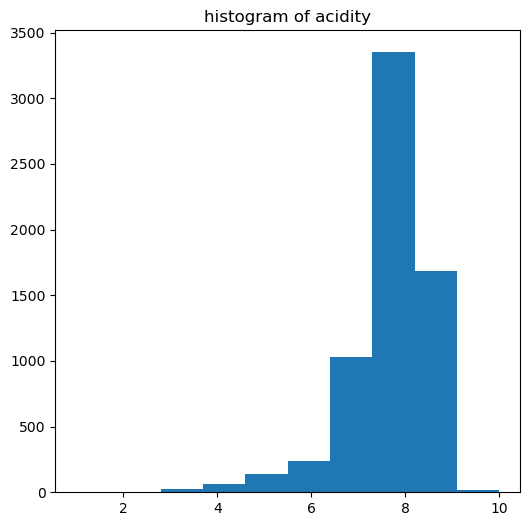

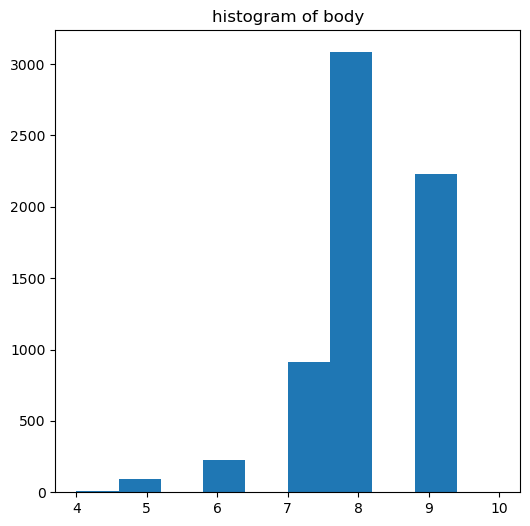

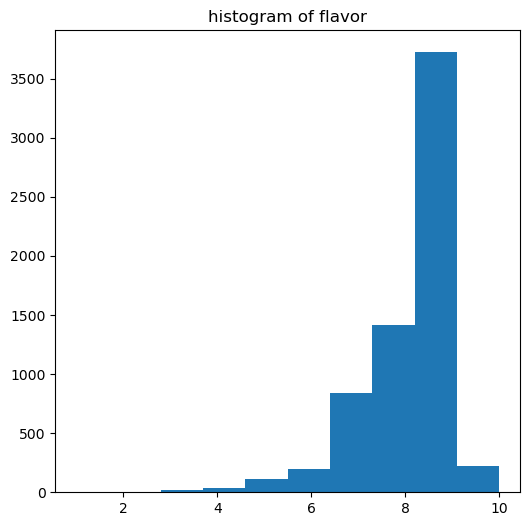

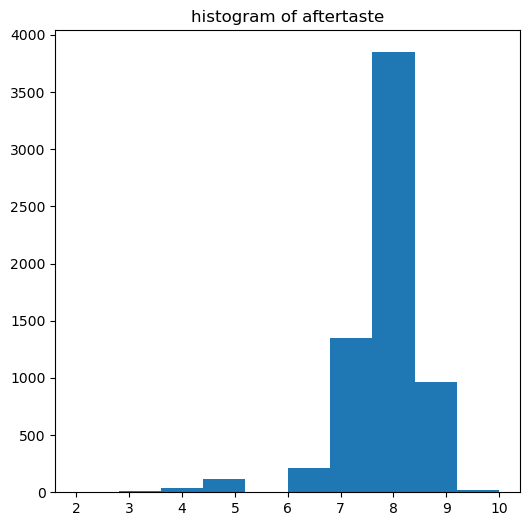

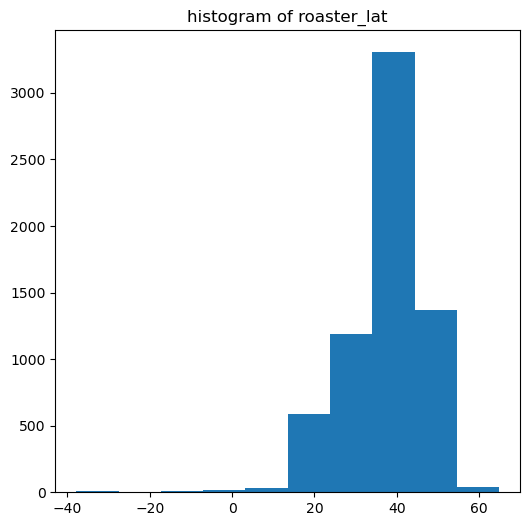

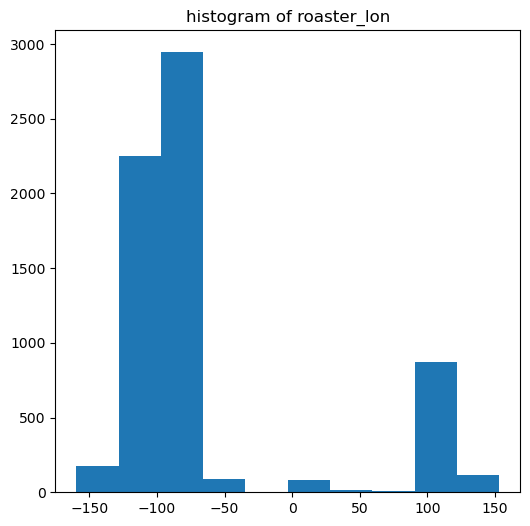

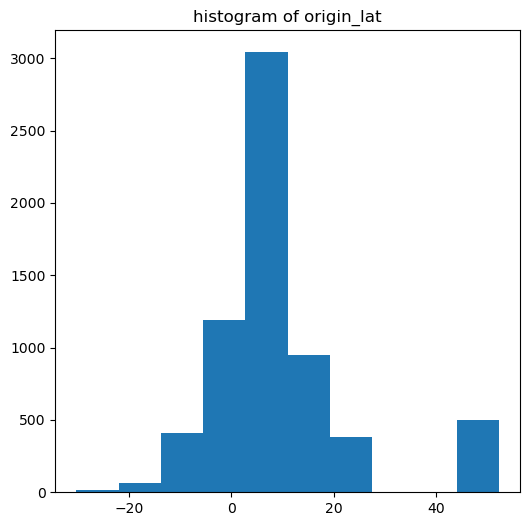

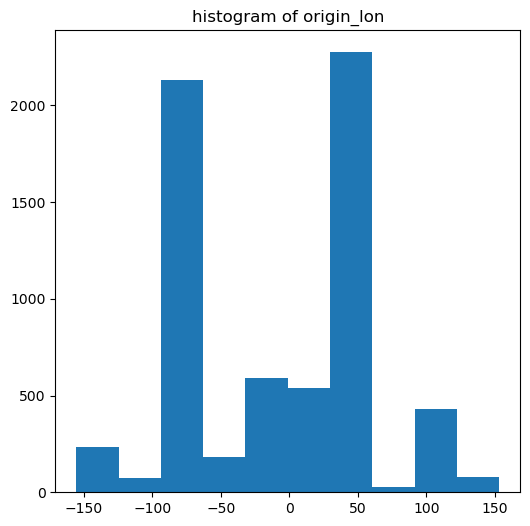

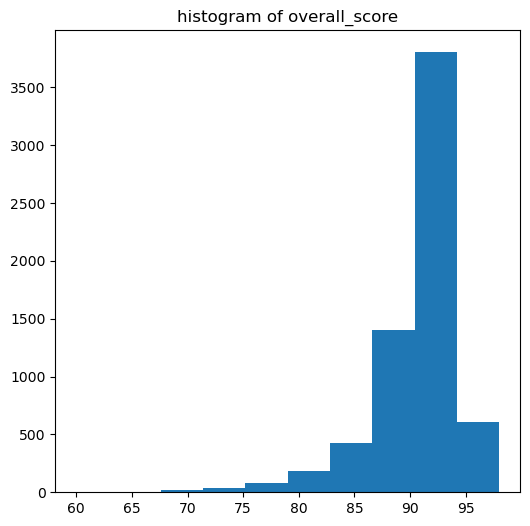

In [8]:
for column in numeric_df.columns:

    plt.figure(figsize = (6,6))
    plt.hist(numeric_df[column])
    plt.title(f"histogram of {column}")
    plt.show()

Commentary on histograms:
- Review month span course of year with spikes in Jan and December
- Number of reviews generally increased year to year
- `bean_agtron` is normally distributed with high number of values between 50 and 60
- `ground_agtron` values are slightly higher on average, with the largest group between 70 and 80
- Subscores for `aroma`, `acidity`, `body`, `flavor`, and `aftertaste` tend to be in higher end of range 0-10
- roasters tend to be in the northern and western hemishere
- coffee tends to originate from the close to the equator in both the western and eastern hemispheres
- `overall_score` (target) tends to be on high end of range 60-100, with most falliing between 90 and 95

To get a preliminary sense of the data, creating a heatmap of correlations between values:

In [9]:
#getting correlations
corr_df = coffee.corr()

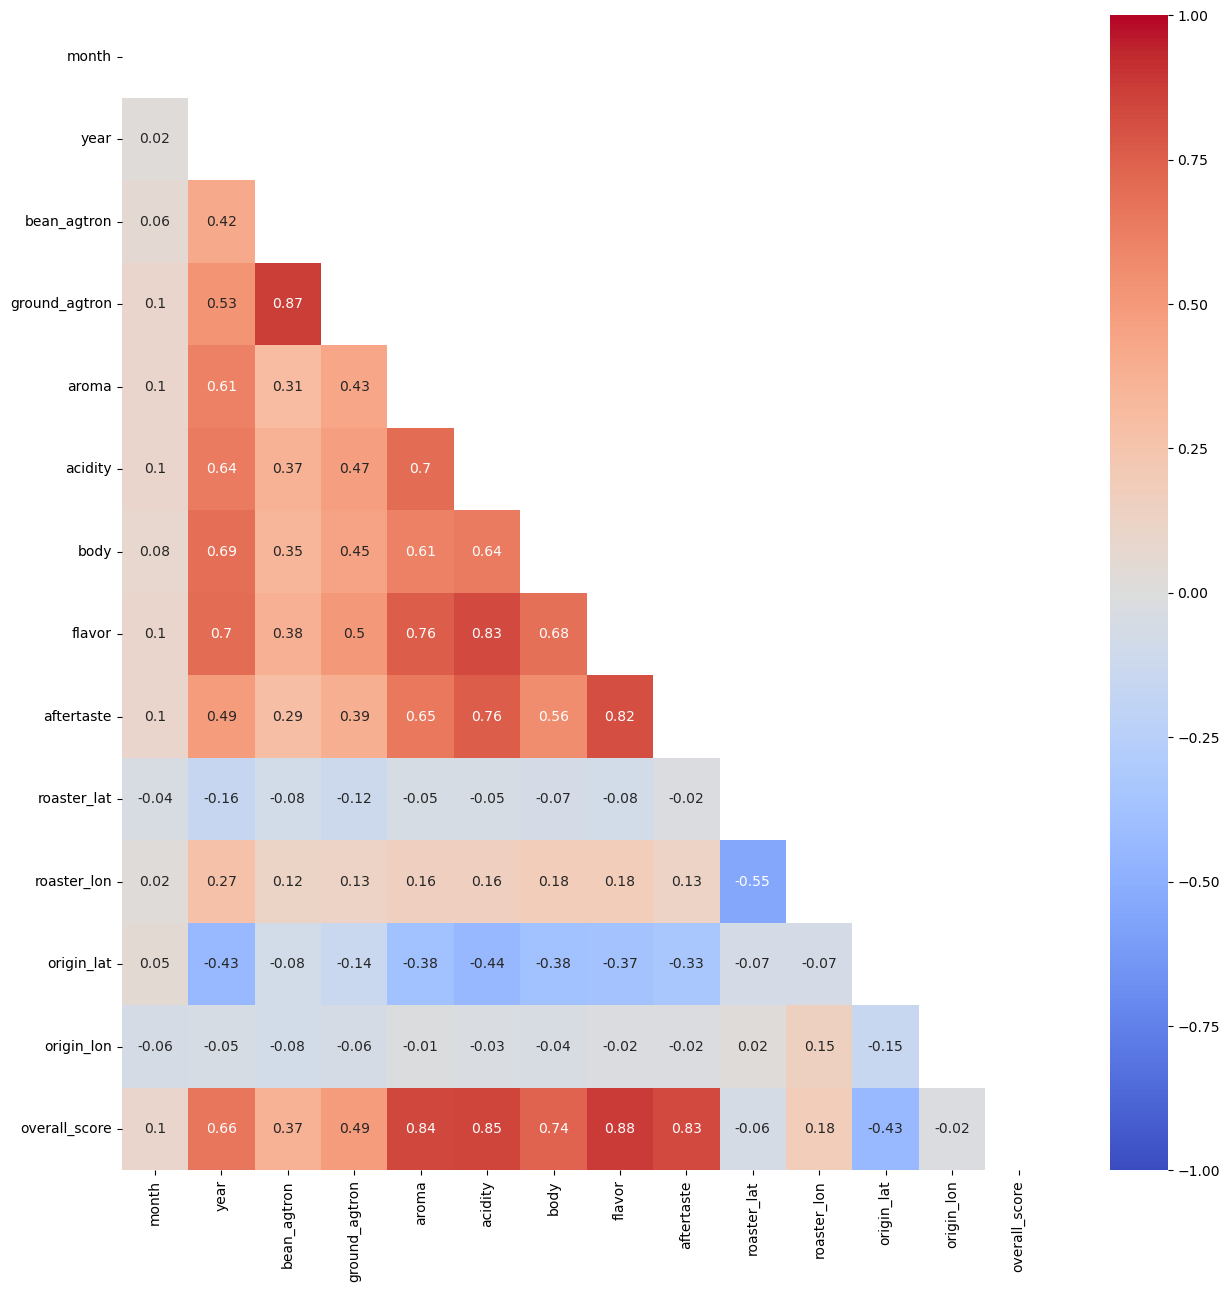

In [10]:
#mapping
mask = np.triu(np.ones_like(corr_df, dtype=bool))

plt.figure(figsize=(15,15))
sns.heatmap(corr_df.round(2), vmax = 1, vmin = -1, center=0, cmap="coolwarm",annot=True, mask=mask)
plt.show()

Commentary of correlations:
- A number of the values are highly correlated with our target `overall_score`, particularly:
    - `year`
    - `aroma`
    - `acidity`
    - `body`
    - `flavor`
    - `aftertaste`

`origin_lat` has a fairly strong inverse relationship with `overall_score`, which could be interesting to dig into further as bean source is a variable that can very practically be controlled.


## 5. Creating Training, Validation and Testing Datasets <a class="anchor" id="header5"></a>

### 5.1 Stratefying the Data <a class="anchor" id="subheader51"></a>

Given that we can't simply stratefy our train, validation and test splits on a continuous target variable, adding a temporary categorical value corresponding to `overall_score`. This allows train, val, test to be stratefied, allowing for even distribution of values for training, validation and testing.

In [11]:
score_mapper = {range(0,70):'one', range(70,80):'two', range(80,90):'three', range(90,95):'four', range(95,101):'five'}

In [12]:
numeric_df['overall_cat'] = numeric_df['overall_score'].replace(score_mapper)

In [13]:
numeric_df['overall_cat'].unique()

array(['four', 'five', 'three', 'two', 'one'], dtype=object)

In [14]:
#verifying splits appear accurate
numeric_df[['overall_score', 'overall_cat']].sample(20)

,overall_score,overall_cat
4922,93,four
5196,90,four
5498,88,three
5434,85,three
3325,90,four
3179,94,four
4247,90,four
5272,95,five
2591,93,four
5704,92,four


### 5.2 Creating X and y Values <a class="anchor" id="subheader52"></a>

Establishing features and target. Target is `overall_score`. We'll drop `overall_cat` before running models.

In [15]:
X = numeric_df.drop(['overall_score','overall_cat'], axis = 1)

In [16]:
X.shape

(6557, 13)

In [17]:
X.head()

,month,year,bean_agtron,ground_agtron,aroma,acidity,body,flavor,aftertaste,roaster_lat,roaster_lon,origin_lat,origin_lon
0,10,2022,60,77,9,9,9,9,8,37.973535,-122.531087,4.099917,-72.908813
1,10,2022,58,78,9,9,9,9,8,33.448437,-112.074141,-6.869970,-75.045851
2,10,2022,59,77,9,9,8,9,8,33.448437,-112.074141,4.099917,-72.908813
3,10,2022,62,78,8,8,9,9,8,37.973535,-122.531087,12.609016,-85.293691
4,10,2022,65,81,9,9,8,9,8,25.072134,121.679919,10.211670,38.652120


In [18]:
y = numeric_df[['overall_score','overall_cat']]

In [19]:
y.shape

(6557, 2)

In [20]:
#check out target value overview
y.describe()

,overall_score
count,6557.000000
mean,90.873723
std,4.089739
min,60.000000
25%,90.000000
50%,92.000000
75%,93.000000
max,98.000000


### 5.3 Graphing Relationships Between Features (X) and Target (y) <a class="anchor" id="subheader53"></a>

Graphing relationships to get sense of data before we start modeling.

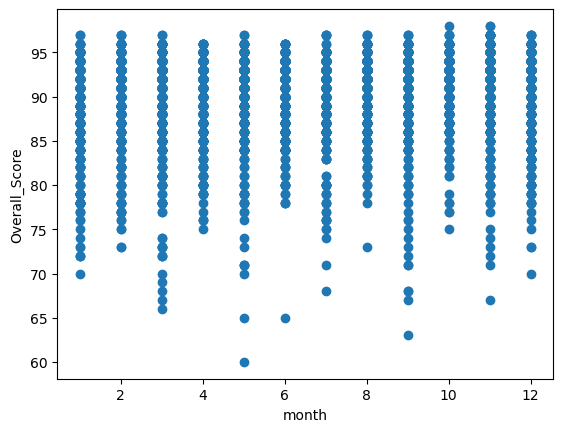

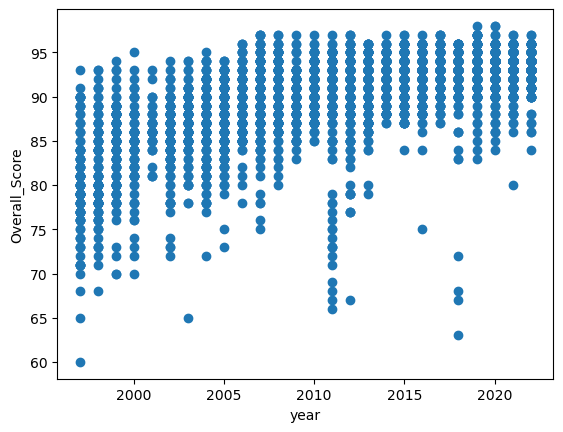

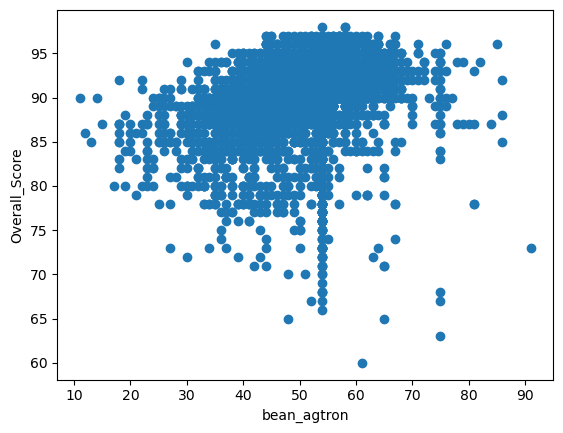

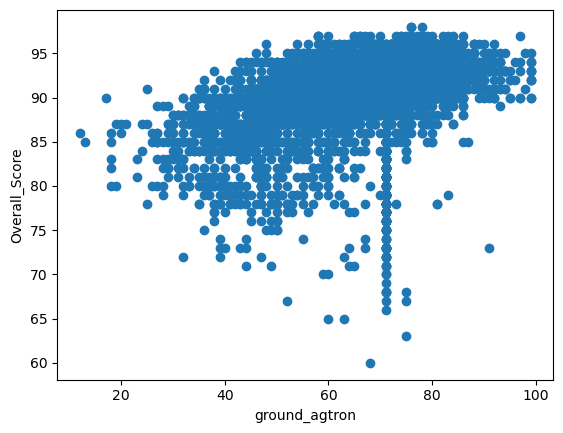

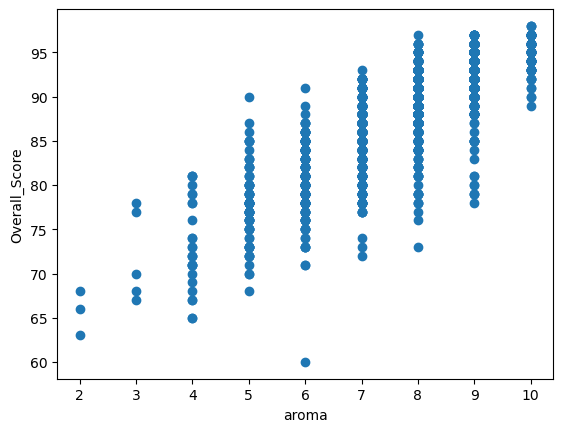

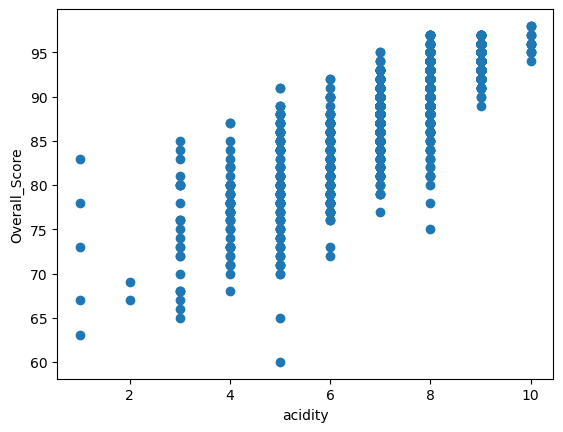

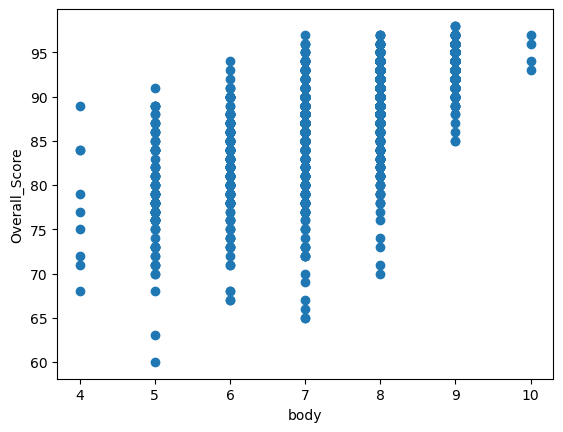

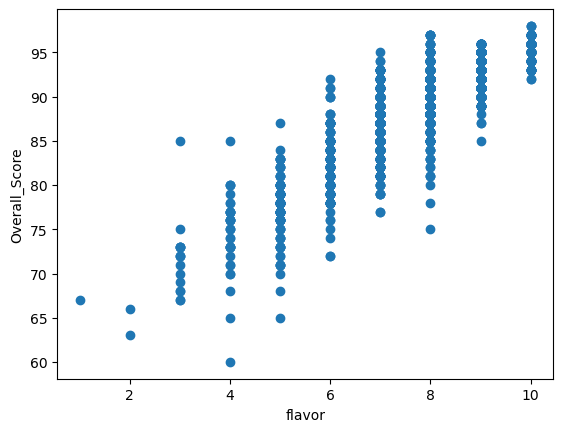

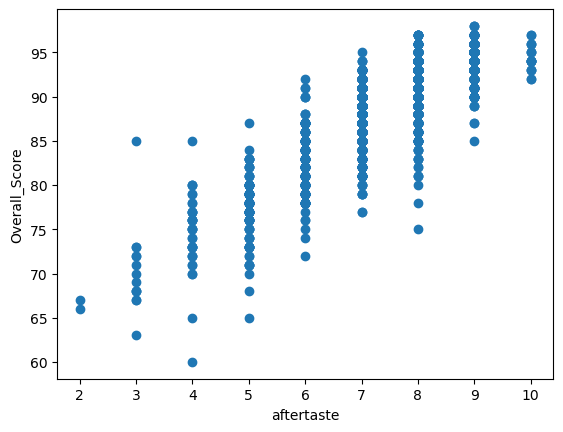

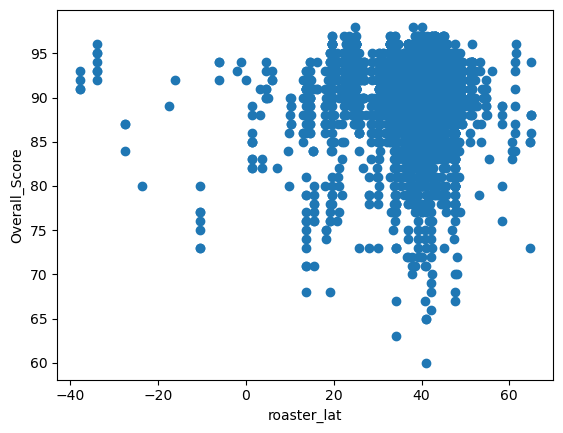

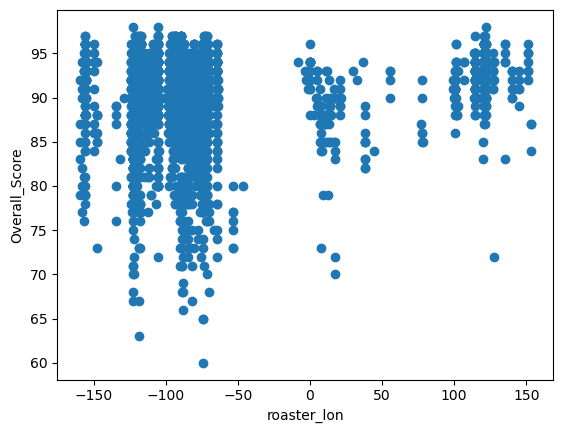

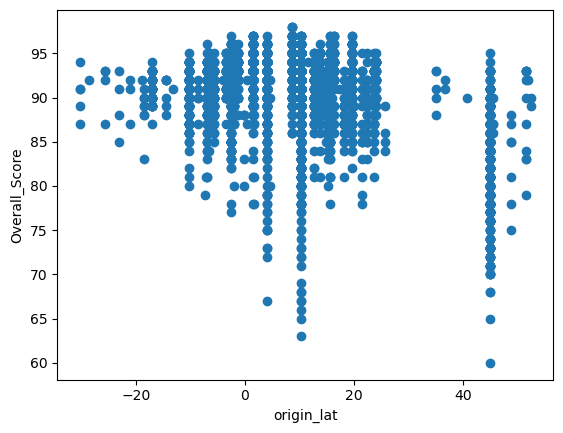

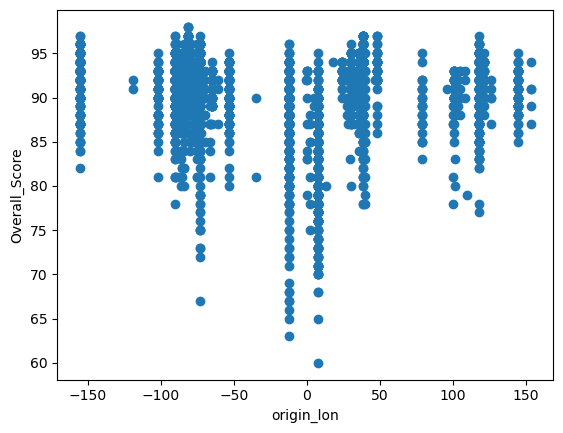

In [21]:
for col in X.columns: 
    plt.figure()
    plt.scatter(X[col], y['overall_score'])
    plt.ylabel('Overall_Score')
    plt.xlabel(col)
    plt.show();

### 5.4 Creating Remain (Training), Validate, Test Splits <a class="anchor" id="subheader54"></a>

In [22]:
#create train/test split, using 20% given dataset size

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y['overall_cat'], test_size=0.2)

In [23]:
#create train/validate split, using 20% given dataset size

X_remain, X_val, y_remain, y_val = train_test_split(X_train, y_train, stratify = y_train['overall_cat'], test_size=0.2)

In [24]:
#checking out proportions
X_train.shape

(5245, 13)

In [186]:
X_remain.shape

(4196, 13)

In [187]:
X_test.shape

(1312, 13)

In [188]:
X_val.shape

(1049, 13)

We expect to see y with 2 columns at this stage, will drop the categorical column that we used to stratify data soon.

In [189]:
y_train.shape

(5245, 2)

In [190]:
y_remain.shape

(4196, 2)

In [191]:
y_val.shape

(1049, 2)

In [192]:
y_test.shape

(1312, 2)

Checking distribution of y values looks similar across remain, validation and test.

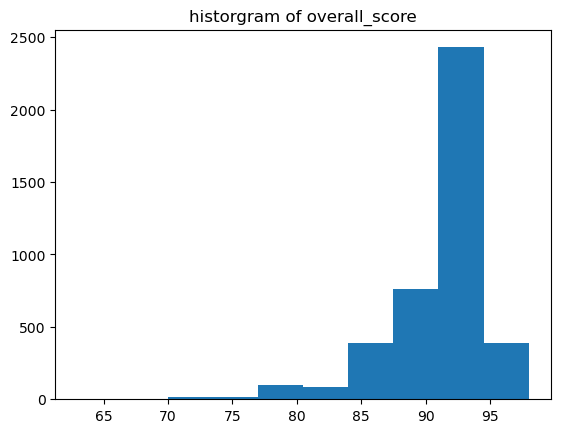

In [193]:
#plot y val distribution
plt.figure()
plt.hist(y_remain['overall_score'])
plt.title('historgram of overall_score')
plt.show()

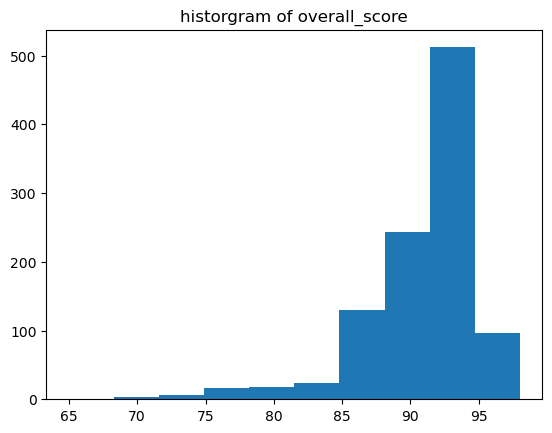

In [194]:
#plot y val distribution
plt.figure()
plt.hist(y_val['overall_score'])
plt.title('historgram of overall_score')
plt.show()

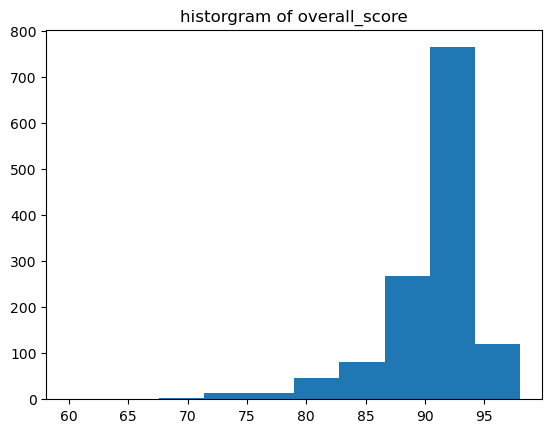

In [195]:
#plot y val distribution
plt.figure()
plt.hist(y_test['overall_score'])
plt.title('historgram of overall_score')
plt.show()

Now that we have evenly distributed splits, we'll drop the categorical column `overall_cat` so that we are just working with our continous targe `overall_score`.

In [196]:
y_train = y_train['overall_score']

In [197]:
y_train.head()

2849    93
6545    89
3717    94
3143    92
1337    93
Name: overall_score, dtype: int64

In [198]:
y_train.shape

(5245,)

In [199]:
y_remain = y_remain['overall_score']

In [200]:
y_remain.shape

(4196,)

In [201]:
y_val = y_val['overall_score']

In [202]:
y_val.head()

5828    82
145     92
822     92
4771    90
438     94
Name: overall_score, dtype: int64

In [203]:
y_val.shape

(1049,)

In [204]:
y_test = y_test['overall_score']

In [205]:
y_test.head()

3787    93
2625    95
4317    88
178     95
2632    94
Name: overall_score, dtype: int64

In [206]:
y_test.shape

(1312,)

## 6. Scaling the data <a class="anchor" id="header6"></a>

Scaling is not necessary for all the baseline models we'll be trying here (such as linear regression). However, the data is on different scales, so we'll go ahead and scale now. Testing both MinMax and StandardScaler. We expect MinMax to be the better fit to adjust for distribution of data.

In [207]:
#standard scaling

s_scaler = StandardScaler()
s_scaler.fit(X_remain)
X_s_scaled_remain = s_scaler.transform(X_remain)
X_s_scaled_val = s_scaler.transform(X_val)
X_s_scaled_test = s_scaler.transform(X_test)

In [208]:
#min max scaling

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_remain)
X_mm_scaled_remain = mm_scaler.transform(X_remain)
X_mm_scaled_val = mm_scaler.transform(X_val)
X_mm_scaled_test = mm_scaler.transform(X_test)

## 7. Creating Baseline Models <a class="anchor" id="header7"></a>

### 7.1 Model 1: Linear Regression <a class="anchor" id="subheader71"></a>

First vanilla model using **standard scaler** fit on X_scaled_remain.

In [209]:
# 1. Instantiate the model
lr_model_1 = LinearRegression()

# 2. Fit the model
lr_model_1.fit(X_s_scaled_remain, y_remain)

# 3. Scoring the models
print(f'The R2 score for lr_model_1 training data is: {lr_model_1.score(X_s_scaled_remain, y_remain)}')
print(f'The R2 score for lr_model_1 validation data is: {lr_model_1.score(X_s_scaled_val, y_val)}')

#saving score so we can printe below and compare
lr_model_1_r2 = lr_model_1.score(X_s_scaled_val, y_val)

#verifying values match
print(lr_model_1_r2)

The R2 score for lr_model_1 training data is: 0.9038959563955108
The R2 score for lr_model_1 validation data is: 0.89806481328623
0.89806481328623


Evaluating validation data, uses **min max scaler**:

In [210]:
# 1. Instantiate the model
lr_model_2 = LinearRegression()

# 2. Fit the model
lr_model_2.fit(X_mm_scaled_remain, y_remain)

# 3. Scoring the models
print(f'The R2 score for lr_model_2 training data is: {lr_model_2.score(X_mm_scaled_remain, y_remain)}')
print(f'The R2 score for lr_model_2 validation data is: {lr_model_2.score(X_mm_scaled_val, y_val)}')

lr_model_2_r2 = lr_model_2.score(X_mm_scaled_val, y_val)
print(lr_model_2_r2)

The R2 score for lr_model_2 training data is: 0.9038959563955108
The R2 score for lr_model_2 validation data is: 0.89806481328623
0.89806481328623


Comparing to **non-scaled** data:

In [211]:
# 1. Instantiate the model
lr_model_3 = LinearRegression()

# 2. Fit the model
lr_model_3.fit(X_remain, y_remain)

# 3. Scoring the models
print(f'The R2 score for lr_model_3 training data is: {lr_model_3.score(X_remain, y_remain)}')
print(f'The R2 score for lr_model_3 validation data is: {lr_model_3.score(X_val, y_val)}')

lr_model_3_r2 = lr_model_3.score(X_val, y_val)
print(lr_model_3_r2)

The R2 score for lr_model_3 training data is: 0.9038959563955109
The R2 score for lr_model_3 validation data is: 0.8980648132862297
0.8980648132862297


Scaling does not seem to have an impact on our linear regression results. Our baseline linear regression model does a fairly good job predicting the results. 

### 7.2 Model 2: KNN <a class="anchor" id="subheader72"></a>

For model 2, we'll look at a KNN model using the min max scaler:

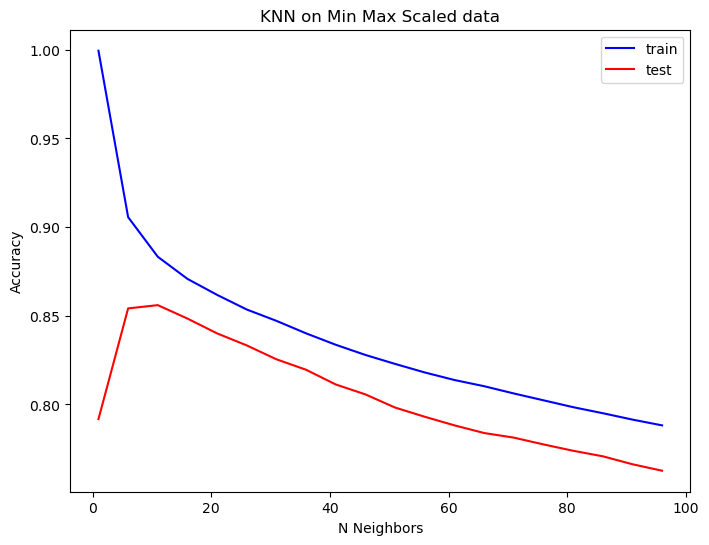

In [232]:
#running across a broad range to see how it performs

k_values = list(range(1,100,5))
train_accs = []
test_accs = []

for k in k_values:
    
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_mm_scaled_remain, y_remain)
    
    train_accs.append(knn_model.score(X_mm_scaled_remain, y_remain))
    test_accs.append(knn_model.score(X_mm_scaled_val, y_val))
    
plt.figure(figsize=(8, 6))
plt.plot(k_values, train_accs, c='blue', label='train')
plt.plot(k_values, test_accs, c='red', label='test')
plt.xlabel('N Neighbors')
plt.ylabel('Accuracy')
plt.title("KNN on Min Max Scaled data")
plt.legend()
plt.show()

In [233]:
#running with narrow range and printing scores

k_values = list(range(1,20))
train_accs = []
test_accs = []

for k in k_values:
    
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_mm_scaled_remain, y_remain)
    
    train_accs.append(knn_model.score(X_mm_scaled_remain, y_remain))
    test_accs.append(knn_model.score(X_mm_scaled_val, y_val))
    
    print(f'Neighbor count: {k}')
    print(f'The R2 score for {k} neighbors remaining data is: {knn_model.score(X_mm_scaled_remain, y_remain)}')
    print(f'The R2 score for {k} neighbors validation data is: {knn_model.score(X_mm_scaled_val, y_val)}')

Neighbor count: 1
The R2 score for 1 neighbors remaining data is: 0.9994999380145225
The R2 score for 1 neighbors validation data is: 0.7916816038686718
Neighbor count: 2
The R2 score for 2 neighbors remaining data is: 0.9542002052124501
The R2 score for 2 neighbors validation data is: 0.8212576724552184
Neighbor count: 3
The R2 score for 3 neighbors remaining data is: 0.9326289038781299
The R2 score for 3 neighbors validation data is: 0.8386286516540371
Neighbor count: 4
The R2 score for 4 neighbors remaining data is: 0.9207429329966011
The R2 score for 4 neighbors validation data is: 0.8486405398204921
Neighbor count: 5
The R2 score for 5 neighbors remaining data is: 0.9125844584728007
The R2 score for 5 neighbors validation data is: 0.8507171513221194
Neighbor count: 6
The R2 score for 6 neighbors remaining data is: 0.905628825041339
The R2 score for 6 neighbors validation data is: 0.8541564845496363
Neighbor count: 7
The R2 score for 7 neighbors remaining data is: 0.900338486734661

Our KNN model works pretty well on the numeric data, although not as well as the linear regression model, with optimal numbers from this basic model around 5-15 neighbors (depends on sample used) to maximize validation performance and bring down overfitting. If we wanted to fit this more robustly, we should use k-fold cross-validation.

In [235]:
#running with 7 neighbors so that we can compare to other models below
knn_model_7 = KNeighborsRegressor(n_neighbors=7)
knn_model_7.fit(X_mm_scaled_remain, y_remain)
    
print(f'The R2 score for knn_model_7 remaining data is: {knn_model.score(X_mm_scaled_remain, y_remain)}')
print(f'The R2 score for knn_model_7 validation data is: {knn_model.score(X_mm_scaled_val, y_val)}')

knn_model_7_r2 = knn_model.score(X_mm_scaled_val, y_val)
print(knn_model_7_r2)

The R2 score for knn_model_7 remaining data is: 0.8649181181564892
The R2 score for knn_model_7 validation data is: 0.8431052630341402
0.8431052630341402


### 7.3 Model 3: Random Forest <a class="anchor" id="subheader73"></a>

We will also test out a baseline Random Forest model:

In [215]:
# 1. Instantiate the model
rf_model = RandomForestRegressor()

# 2. Fit the model
rf_model.fit(X_mm_scaled_remain, y_remain)

# 3. Scoring the models
print(f'The R2 score for rf_model training data is: {rf_model.score(X_mm_scaled_remain, y_remain)}')
print(f'The R2 score for rf_model validation data is: {rf_model.score(X_mm_scaled_val, y_val)}')

rf_model_r2 = rf_model.score(X_mm_scaled_val, y_val)
print(rf_model_r2)

The R2 score for rf_model training data is: 0.9869921955857024
The R2 score for rf_model validation data is: 0.9162645420739084
0.9162645420739084


Out of the box, our Random Forest model is working the best so far.

### 7.4 Model 4: Support Vector Machine (SVR) <a class="anchor" id="subheader74"></a>

For this model, we will look at a couple Support Vector Regressor models; we'll compare LinearSVR and SVR using a couple different kernels:

In [216]:
# 1. Instantiate the model
lsvr_model = LinearSVR()

# 2. Fit the model
lsvr_model.fit(X_mm_scaled_remain, y_remain)

# 3. Scoring the models
print(f'The R2 score for lsvr_model training data is: {lsvr_model.score(X_mm_scaled_remain, y_remain)}')
print(f'The R2 score for lsvr_model validation data is: {lsvr_model.score(X_mm_scaled_val, y_val)}')

lsvr_model_r2 = lsvr_model.score(X_mm_scaled_val, y_val)
print(lsvr_model_r2)

The R2 score for lsvr_model training data is: 0.8803408996747474
The R2 score for lsvr_model validation data is: 0.8757695797966701
0.8757695797966701


In [217]:
# 1. Instantiate the model
rbf_svr_model = SVR(kernel='rbf')

# 2. Fit the model
rbf_svr_model.fit(X_mm_scaled_remain, y_remain)

# 3. Scoring the models
print(f'The R2 score for rbf_svr_model training data is: {rbf_svr_model.score(X_mm_scaled_remain, y_remain)}')
print(f'The R2 score for rbf_svr_model validation data is: {rbf_svr_model.score(X_mm_scaled_val, y_val)}')

rbf_svr_model_r2 = rbf_svr_model.score(X_mm_scaled_val, y_val)
print(rbf_svr_model_r2)

The R2 score for rbf_svr_model training data is: 0.8952744372300561
The R2 score for rbf_svr_model validation data is: 0.8909594058398818
0.8909594058398818


In [218]:
# 1. Instantiate the model
p_svr_model = SVR(kernel='poly')

# 2. Fit the model
p_svr_model.fit(X_mm_scaled_remain, y_remain)

# 3. Scoring the models
print(f'The R2 score for p_svr_model training data is: {p_svr_model.score(X_mm_scaled_remain, y_remain)}')
print(f'The R2 score for p_svr_model validation data is: {p_svr_model.score(X_mm_scaled_val, y_val)}')

p_svr_model_r2 = p_svr_model.score(X_mm_scaled_val, y_val)
print(p_svr_model_r2)

The R2 score for p_svr_model training data is: 0.9074358356045514
The R2 score for p_svr_model validation data is: 0.8928101474479297
0.8928101474479297


In [219]:
# 1. Instantiate the model
sig_svr_model = SVR(kernel='sigmoid')

# 2. Fit the model
sig_svr_model.fit(X_mm_scaled_remain, y_remain)

# 3. Scoring the models
print(f'The R2 score for sig_svr_model training data is: {sig_svr_model.score(X_mm_scaled_remain, y_remain)}')
print(f'The R2 score for sig_svr_model validation data is: {sig_svr_model.score(X_mm_scaled_val, y_val)}')

sig_svr_model_2 = sig_svr_model.score(X_mm_scaled_val, y_val)
print(sig_svr_model_2)

The R2 score for sig_svr_model training data is: -0.1376098529249974
The R2 score for sig_svr_model validation data is: -0.1363288200823709
-0.1363288200823709


Using 'rbf' and 'poly' kernels work pretty well. Sigmoid is abysmal. Purely linear doesn't work as well as the other SVR models or linear regression.

### 7.5 Model 5: XG Boost Regressor <a class="anchor" id="subheader75"></a>

For this model, we'll look at XG Boost Regressor:

In [220]:
# 1. Instantiate the model
XGBR_model = XGBRegressor()

# 2. Fit the model
XGBR_model.fit(X_mm_scaled_remain, y_remain)

# 3. Scoring the models
print(f'The R2 score for XGBR_model training data is: {XGBR_model.score(X_mm_scaled_remain, y_remain)}')
print(f'The R2 score for XGBR_model validation data is: {XGBR_model.score(X_mm_scaled_val, y_val)}')

XGBR_model_r2 = XGBR_model.score(X_mm_scaled_val, y_val)
print(XGBR_model_r2)

The R2 score for XGBR_model training data is: 0.9910514094382763
The R2 score for XGBR_model validation data is: 0.9184271113312694
0.9184271113312694


Out of the box, the XGBoost Regressor model does well, right up there with Random Forest.

### 7.6 Model 6: Neural Network <a class="anchor" id="subheader76"></a>

For this last baseline model, we'll build a basic neural network using tensorflow.

In [221]:
X_mm_scaled_remain.shape

(4196, 13)

In [222]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(13, activation="relu"))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(13, activation="relu"))

# Declare the output layer
model.add(layers.Dense(1))

In [223]:
model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),  
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError()
)

In [224]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

history = model.fit(X_mm_scaled_remain, y_remain, epochs = 200, callbacks=[callback], verbose=1)

Epoch 1/200
132/132 [==============================] - 1s 1ms/step - loss: 7650.0693
Epoch 2/200
132/132 [==============================] - 0s 1ms/step - loss: 1955.7305
Epoch 3/200
132/132 [==============================] - 0s 1ms/step - loss: 43.4506
Epoch 4/200
132/132 [==============================] - 0s 2ms/step - loss: 41.0411
Epoch 5/200
132/132 [==============================] - 0s 1ms/step - loss: 38.4712
Epoch 6/200
132/132 [==============================] - 0s 2ms/step - loss: 35.8078
Epoch 7/200
132/132 [==============================] - 0s 2ms/step - loss: 33.1791
Epoch 8/200
132/132 [==============================] - 0s 1ms/step - loss: 30.6082
Epoch 9/200
132/132 [==============================] - 0s 1ms/step - loss: 28.2143
Epoch 10/200
132/132 [==============================] - 0s 1ms/step - loss: 25.9866
Epoch 11/200
132/132 [==============================] - 0s 2ms/step - loss: 23.8730
Epoch 12/200
132/132 [==============================] - 0s 1ms/step - loss: 22.04

In [225]:
# Evaluate the model using the test data and generate predictions
train_loss = history.history["loss"][-1]
result = model.evaluate(X_mm_scaled_val, y_val, verbose=0)

print(f"Train Loss: {train_loss:.4f}")
print(f"Val Loss: {result:.4f}")

y_pred = model.predict(X_mm_scaled_val)

Train Loss: 1.6277
Val Loss: 1.7613


In [226]:
neural_network_r2 = r2_score(y_val,y_pred)
print(neural_network_r2)

0.8944085119316274


This baseline neural network does pretty well. There is a lot of customization that can improve the neural network, so it is worth exploring the model further.

## 8. Summary of Baseline Model Performance <a class="anchor" id="header8"></a>

Below is a summary of $R^2$ scores for the various baseline models. These should be taken with a grain of salt, as changes in sample result in performance changes (from running this notebook, generally seeing fluctuations around +- 1).

In [228]:
#put scores in a dictionary that we can sort
R2_dictionary = {'Standard Scaler linear regression r2': lr_model_1_r2, 'Min Max Scaler linear regression r2': lr_model_2_r2, 'Non-scaled linear regression r2':lr_model_3_r2, 'KNN r2': knn_model_7_r2, "Random Forest r2": rf_model_r2,'Linear SVR r2':lsvr_model_r2, 'RBF SVR r2': rbf_svr_model_r2,'Poly SVR r2': p_svr_model_r2, 'Sigmoid SVR r2': sig_svr_model_2, 'XGBoost r2':XGBR_model_r2, 'Neural network r2':neural_network_r2}

In [229]:
#sorting scores
R2_values_sorted = dict(sorted(R2_dictionary.items(), key = operator.itemgetter(1), reverse=True))

Baseline models sorted by R2:

In [230]:
R2_values_sorted

{'XGBoost r2': 0.9184271113312694,
 'Random Forest r2': 0.9162645420739084,
 'Standard Scaler linear regression r2': 0.89806481328623,
 'Min Max Scaler linear regression r2': 0.89806481328623,
 'Non-scaled linear regression r2': 0.8980648132862297,
 'Neural network r2': 0.8944085119316274,
 'Poly SVR r2': 0.8928101474479297,
 'RBF SVR r2': 0.8909594058398818,
 'Linear SVR r2': 0.8757695797966701,
 'KNN r2': 0.8431052630341402,
 'Sigmoid SVR r2': -0.1363288200823709}

In the next notebook, we'll work on vectorizing our text data. After that, we'll combine numeric and text data, and work on finding an optimal model using all our data. 

## 9. References <a class="anchor" id="header9"></a>

- Used this [code](https://www.w3resource.com/python-exercises/dictionary/python-data-type-dictionary-exercise-1.php) to sort the dictionary of $R^2$ scores at end
- BrainStation class notebooks